In [1]:
import jax
import jax.numpy as jnp
from jax import grad, vmap, jit
import jax.random as random
from functools import partial
from typing import Callable, Union
from collections import namedtuple
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from matplotlib.lines import Line2D
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker

from kernel import imq_kernel, rbf_kernel
from model import model
from methods import VGD
from experiment import experiment, diagnostic_experiment

In [2]:
def my_sigmoid(x):
    return 1 / (1 + jnp.exp(-x))

def sigmoid_reg(theta, x):
    return 1 / (1 + jnp.exp(-theta * x))

sig_model = model(0.05, sigmoid_reg, theta_dim=1)

## 100 well

In [3]:
# z = b0 + b1*x
b0 = 0  # intercept)
b1 = 10   # slope
sigma = 0.05
prefix = 'sig'

key = random.PRNGKey(40)
rng, rng2 = random.split(key)
n_data = 100

x = random.uniform(rng, (n_data,))*2-1

# observed data with noise
noise = random.normal(rng2, x.shape) * sigma
y_observed = my_sigmoid(b0 + b1 * x) + noise

# y_observed = np.clip(y_observed, 0.01, 0.99)

data_sig_100_w = (x, y_observed)

experiment_sig_100_w = experiment(sig_model, data_sig_100_w, n_particles=20, kernel=imq_kernel, key=random.PRNGKey(49))
experiment_sig_100_w.run(n_steps=10000, step_size=0.01, lengthscale=0.1)

  0%|          | 0/10000 [00:00<?, ?it/s]

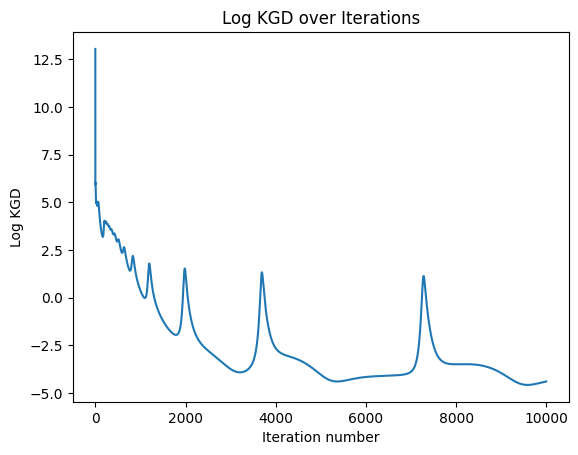

In [4]:
experiment_sig_100_w.plot_KGD()

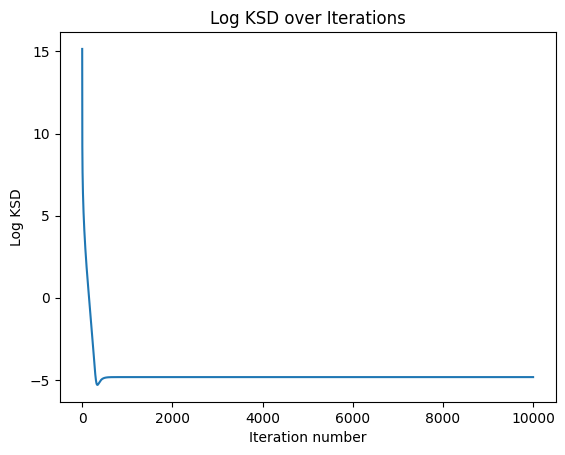

In [5]:
experiment_sig_100_w.plot_KSD()

In [4]:
diagnostic_experiment_sig_100_w = diagnostic_experiment(experiment_sig_100_w)

In [5]:
all_mmd_values_sig_100_w, actual_mmd_sig_100_w = diagnostic_experiment_sig_100_w.plot_diagnostic()

[[1.0440592 0.8619663]
 [0.9850472 0.8082058]]


  0%|          | 0/10000 [00:00<?, ?it/s]

ValueError: vmap in_axes must be an int, None, or a tuple of entries corresponding to the positional arguments passed to the function, but got len(in_axes)=2, len(args)=1